# **クラスタリング**

・機械学習を活用したクラスタリングを実施できること

・クラスタリング結果に基づいた考察の流れを理解すること

**教師あり学習**：説明変数と目的変数がセットになっているデータで学習すること

**教師なし学習**：説明変数や目的変数と言った区別のないデータで学習すること

クラスタリング手順

１．課題把握とゴールの設定

２．必要なライブラリーのインポート

３．データセットの準備

４．データセットのクラスタリング

**１．課題把握とゴール設定**

課題

・カリフォルニアで飲食店の新ビジネスを立ち上げたい

・カリフォルニアの住宅データがあるので、それをもとに何かヒントを得たい

ゴール

・カリフォルニアの住宅データをクラスタリングして、飲食店ビジネスに役立ちそうな知見を見いだす

k-means法：幅広い目的で活用されるクラスタリング

**２．必要なライブラリのインポート**

In [1]:
#pandasとseabornをインポート
import pandas as pd
import seaborn as sns

#グラフの文字化け回避
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=34610209a79df6378bcf6b0de9ed4707569af85cb6300c3864678f5ef912d877
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


**３．データセットの準備**

In [5]:
#california_housing_cleansing.csvの読み込み　と　最初の5行表示
df = pd.read_csv('/content/california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [6]:
#Unnamed: 0を削除し最初の５行を表示
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [7]:
#データの行数と列数を取得
df.shape

(18572, 8)

In [8]:
#各要素の標準を行う
#StandardScalerクラスをインポートしインスタンス化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
#全データを変数Xに代入し、引数に指定してfitメソッドを実行
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [10]:
#標準化の変換モデルを利用して、Xを標準化させる。
X_scaled = scaler.transform(X)
X_scaled

array([[ 2.95027401,  1.22609842, -0.98751408, ...,  2.745577  ,
         0.7095734 ,  0.01067288],
       [ 2.9351148 , -0.5234521 ,  0.80023789, ...,  1.76319575,
         0.90892516,  0.25820709],
       [-1.02729904,  1.31357595, -0.22735403, ...,  0.38723561,
         0.16225546,  0.6325512 ],
       ...,
       [-1.26959164, -0.87336221, -0.39847603, ..., -1.01586791,
         0.26894728,  0.344762  ],
       [-1.163095  , -0.78588468, -0.62721197, ..., -1.09521007,
         0.51108372,  0.63480794],
       [-0.83099363, -0.96083973, -0.0717104 , ..., -1.04614321,
         0.06368403,  0.19008646]])

全列のスケールがそろっていることを確認でき……た？らしい

**４．データセットのクラスタリング**

scilit-learnにはl-means法のためのクラスが提供されている。

KMeansクラスをインスタンス化する時点で、いくつのクラスターに分けるかを指定する必要がある。

クラスター数は分析者本人が試行錯誤しながら決める。

(エルボー法という手法もあるらしい

今回はクラスター数「４」を指定する。

クラスター数を指定しない場合、デフォルト設定の「８」で実施される。

また、k-means法によるクラスタリングのロジックには乱数が活用されている。

実行ごとに結果が変わることを避けたい場合は、random_stateを指定する。

In [11]:
#clusterモジュールのKMeansクラスをインポート
from sklearn.cluster import KMeans

In [12]:
#KMeansクラスをインスタンス化。
model = KMeans(n_clusters=4, random_state=0)

In [13]:
#標準化済みのデータX_scaledを用いてクラスタリングを実行
model.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [14]:
#クラスタリングの結果を表示（model.labels_で属するクラスターのラベルを確認できる。)
model.labels_

array([3, 3, 2, ..., 2, 2, 2], dtype=int32)

In [15]:
#取り込んだデートセットにクラスター列としてラベル情報を追加する。
df['クラスター'] = model.labels_
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人,クラスター
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621,3
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641,3
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410,2
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026,2
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596,2


# **クラスタリング結果に対する考察**

考察一例

１．クラスター別のデータ数の確認

２．クラスター別の平均値の比較

３．各クラスターと緯度経度の関係の確認

４，特定のクラスターに的を絞った深堀

５．考察結果

**１．クラスター別のデータ数の確認**

４つのクラスターがそれぞれどの程度のデータ数を保持しているか確認してみる。

seabornのcountplot関数によって、データ数を棒グラフで可視化できる。

<Axes: xlabel='クラスター', ylabel='count'>

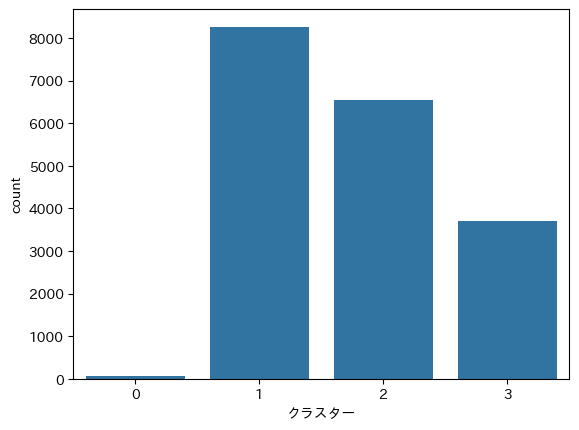

In [16]:
#dataパラメータにDataFrameを、xパラメータにはカウントしたい列名を指定する。
sns.countplot(x='クラスター', data=df)

**２．クラスター別の平均値の比較**

In [18]:
#pandasのgroupbyメソッドを利用して平均値を出力
df.groupby('クラスター').mean()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
クラスター,,,,,,,,
0,3.411902,17.844828,258.465517,37.657931,-119.398621,1.631759,15.491913,3.311716
1,3.096448,28.700508,1588.614230,33.949056,-117.934154,1.594186,1.617127,0.365254
2,3.247161,26.493284,1290.675519,38.029977,-121.591969,1.518446,1.993898,0.410637
3,5.821776,24.160087,1543.627096,34.917772,-119.218648,3.243935,2.335645,0.403256


**３．各クラスターと緯度経度の関係の確認**

<Axes: xlabel='経度', ylabel='緯度'>

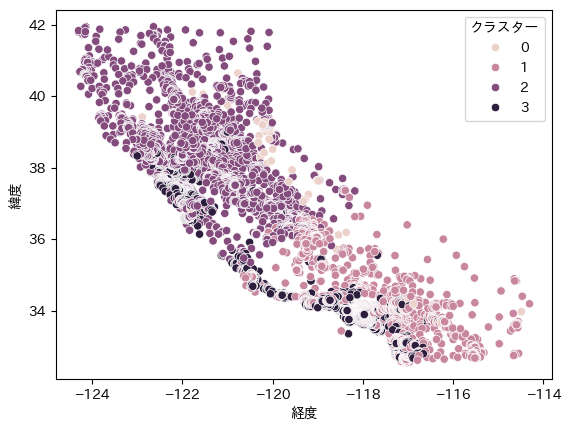

In [19]:
#各データを緯度と経度でマッピングしてみる。
#seabornのscatterplot関数を利用し、hueパラメータにクラスターという列名を指定することでクラスター別の色分けが可能。
sns.scatterplot(x='経度', y='緯度', hue='クラスター', data=df)

**４．特定のクラスターに的を絞った深堀**

クラスター３は沿岸部の中でも特に、北西端と南東端に比較的多く分布していることが確認できる


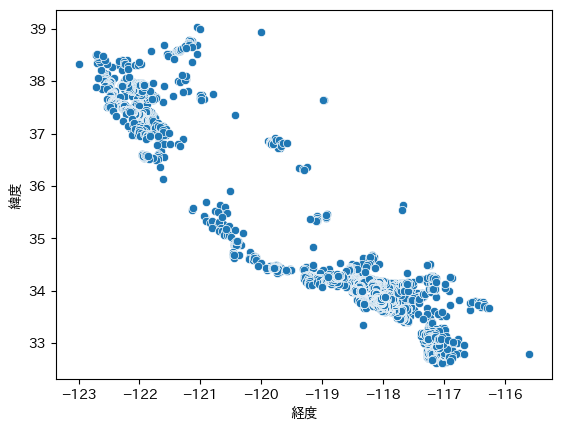

In [22]:
#富裕層クラスターと考えられるクラスター３に絞って、緯度と経度でマッピングする。
df_cluster3 = df.query('クラスター == 3')
sns.scatterplot(x='経度', y='緯度', data=df_cluster3)

#ここから分かること
print("クラスター３は沿岸部の中でも特に、北西端と南東端に比較的多く分布していることが確認できる")

ボリュームゾーンは0-3000名だが、5000名を超えるデータも点在する。


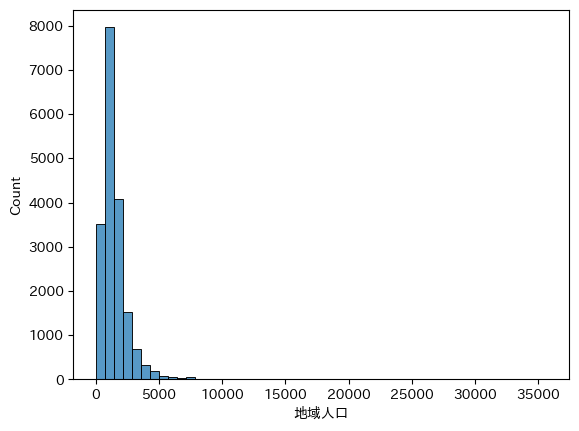

In [24]:
#クラスター３に属するデータの地域人口分布をヒストグラムで表示してみる。
#seabornのhistplot関数によってヒストグラムを描画可能
#dataパラメータに対象のDataFrameを、xパラメータに可視化したい列名を指定する。
sns.histplot(x='地域人口', data=df, bins=50)

#ここから分かること
print("ボリュームゾーンは0-3000名だが、5000名を超えるデータも点在する。")

地域人口が5,000名を超えるクラスター3のポイントが、経度-122°緯度37.5°付近、経度-118°緯度34°のエリアに比較的集中している。


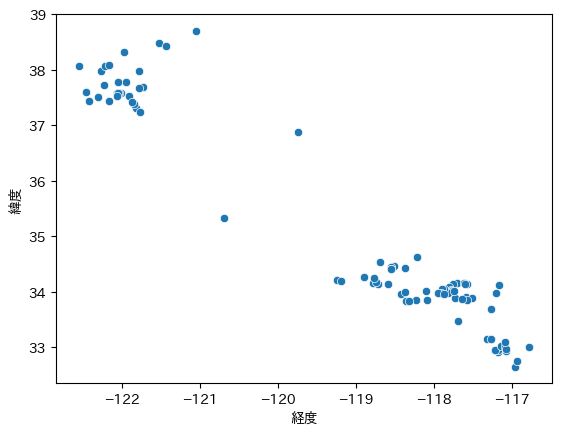

In [28]:
#人口5000名を超えるクラスター3のデータを緯度と経度でマッピングしてみる。
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 5000'))
#ここから分かること
print('地域人口が5,000名を超えるクラスター3のポイントが、経度-122°緯度37.5°付近、経度-118°緯度34°のエリアに比較的集中している。')

**５．考察結果**

**ゴール**

・カリフォルニアの住宅価格データをクラスタリングして、飲食店ビジネスに役立ちそうな知見を見いだす


**結果**

・カリフォルニアの沿岸部、中でも北西端と南東端に、富裕層が多く居住している可能性が示唆される。

・地域人口が5000名を越え、さらに富裕層が多いと推測されるエリアは、経度-122°緯度37.5°付近、および経度-118°緯度34°付近である。

・これらエリアに富裕層向けの飲食店を展開する計画が、1つの案として推奨される。

# **演習**